In [1]:
import pandas as pd

DATA_GLUCOSE = '2024-03-23'

 # Import csv data
df_g = pd.read_csv('Data/Cleaned/Glucose.csv')
df_f = pd.read_csv('Data/Cleaned/Food.csv')

# Merge dataframes on both date and time
df = pd.merge(df_g, df_f, on=['date', 'time'], how='outer')

# Create datetime from date and time
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Filter data for since the first date we tracked glucose data
df = df[df['datetime'] >= DATA_GLUCOSE]
df = df.sort_values('datetime')

df.head()


,date,time,glucose,calcium,calories,carbs,cholesterol,fat,fiber,iron,monounsaturated fat,polyunsaturated fat,potassium,protein,saturated fat,sodium,sugar,vitamin_c,datetime
38,2024-03-23,00:03:00,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-23 00:03:00
39,2024-03-23,00:18:00,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-23 00:18:00
40,2024-03-23,00:33:00,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-23 00:33:00
41,2024-03-23,00:48:00,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-23 00:48:00
42,2024-03-23,01:03:00,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-23 01:03:00


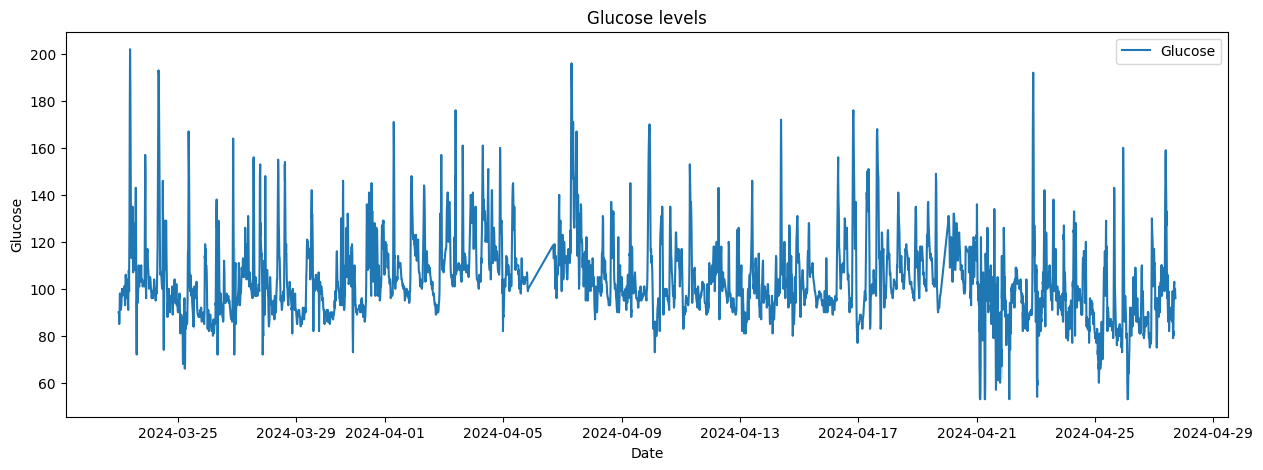

In [2]:
# Plot the data using as x axis the date and time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.lineplot(x='datetime', y='glucose', data=df, label='Glucose')

# Add carbs and sugar to the plot as barcharts
#df['carbs'] = df['carbs'].fillna(0)
# df['sugar'] = df['sugar'].fillna(0)

# Fill na with 0 in carbs
# plt.bar(df['datetime'], df['carbs'], color='blue', alpha=1, label='Carbs', width=0.01)
#plt.bar(df['datetime'], df['sugar'], color='red', alpha=1, label='Sugar', width=0.01)

plt.xlabel('Date')
plt.ylabel('Glucose')
plt.title('Glucose levels')
plt.legend()
plt.show()


In [3]:
# Set datetime as index
df_g['datetime'] = pd.to_datetime(df_g['date'] + ' ' + df_g['time'])
df_g = df_g.set_index('datetime')

# Generate another column in df_g with the time 2h later
df_g['datetime_2h'] = df_g.index + pd.Timedelta(hours=2)

# Create a for loop that for each row loops and finds the max glucose value in the rest of the dataframe, as long as time is between datetime and datetime_2h
max_glucose = []
for i in range(len(df_g)):
    max_glucose.append(df_g[(df_g.index >= df_g.index[i]) & (df_g.index <= df_g['datetime_2h'][i])]['glucose'].max())

# Add the max_glucose list to the dataframe
df_g['max_glucose_2h'] = max_glucose

df_g.head()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20592\1996631528.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_glucose.append(df_g[(df_g.index >= df_g.index[i]) & (df_g.index <= df_g['datetime_2h'][i])]['glucose'].max())


,date,time,glucose,datetime_2h,max_glucose_2h
datetime,,,,,
2024-03-22 20:47:00,2024-03-22,20:47:00,93.0,2024-03-22 22:47:00,131.0
2024-03-22 21:03:00,2024-03-22,21:03:00,107.0,2024-03-22 23:03:00,131.0
2024-03-22 21:18:00,2024-03-22,21:18:00,122.0,2024-03-22 23:18:00,131.0
2024-03-22 21:33:00,2024-03-22,21:33:00,131.0,2024-03-22 23:33:00,131.0
2024-03-22 21:48:00,2024-03-22,21:48:00,119.0,2024-03-22 23:48:00,119.0


In [4]:
# Join onto df_f the information from df_g. Merge based on the closest datetime, and as a left join
df_f['datetime'] = pd.to_datetime(df_f['date'] + ' ' + df_f['time'])
df_f = df_f.set_index('datetime')

# Sort the dataframes
df_f = df_f.sort_values('datetime')
df_g = df_g.sort_values('datetime')

# Filter df_f for dates after 2024-03-23
df_f = df_f[df_f.index >= DATA_GLUCOSE]

df_f2 = pd.merge_asof(df_f, df_g, left_on='datetime', right_on='datetime', direction='nearest')
df_f2 = df_f2.set_index('datetime')

df_f2.head()

,date_x,time_x,calcium,calories,carbs,cholesterol,fat,fiber,iron,monounsaturated fat,...,protein,saturated fat,sodium,sugar,vitamin_c,date_y,time_y,glucose,datetime_2h,max_glucose_2h
datetime,,,,,,,,,,,,,,,,,,,,,
2024-03-23 09:48:00,2024-03-23,09:48:00,231.4,89.000,23.3536,0.0,0.178,2.492,0.0000,0.02314,...,4.9612,0.01602,1.78,17.533,51.0504,2024-03-23,09:35:00,186.0,2024-03-23 11:35:00,186.0
2024-03-23 11:48:00,2024-03-23,11:48:00,0.0,377.000,40.05,0.0,5.85,5.15,0.0000,0,...,38.05,1.2,300.177,0.65,0.0000,2024-03-23,11:50:00,107.0,2024-03-23 13:50:00,128.0
2024-03-23 15:13:00,2024-03-23,15:13:00,31.6,641.187,58.9646,0.0,26.9404,2.80502,1.7055,1.86825,...,40.2271,8.91522,195.498,13.3921,10.6560,2024-03-23,14:54:00,95.0,2024-03-23 16:54:00,110.0
2024-03-23 22:07:00,2024-03-23,22:07:00,87.1,911.640,84.1247,35.0,46.754,5.876,3.4929,7.86213,...,42.7884,10.7094,1136.15,17.2449,18.0510,2024-03-23,22:07:00,102.0,2024-03-24 00:07:00,117.0
2024-03-24 08:29:00,2024-03-24,08:29:00,0.0,284.000,38.75,0.0,5.45,5.15,0.0000,0,...,17.05,0.95,300,0.45,0.0000,2024-03-24,08:24:00,193.0,2024-03-24 10:24:00,193.0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20592\4063148873.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_f2['sugar'][i], df_f2['max_glucose_2h'][i], df_f2.index[i].strftime('%Y-%m-%d %H:%M'))


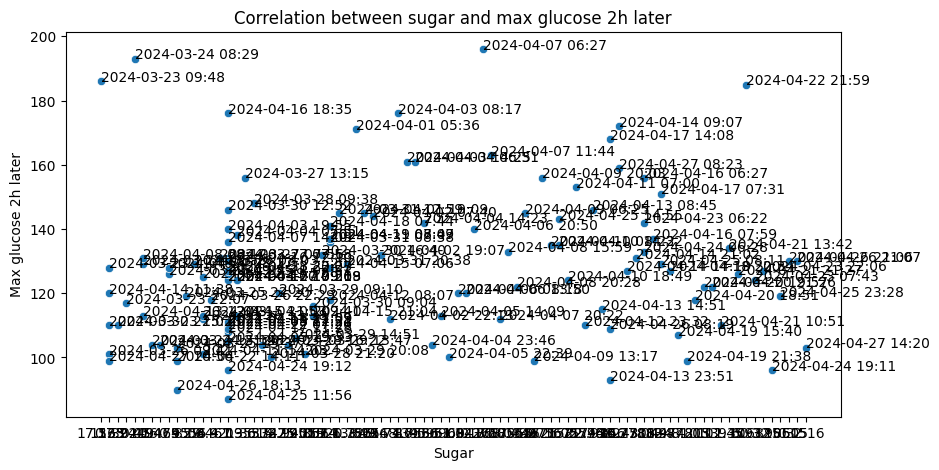

In [5]:
# Plot the correlation between sugar and max_glucose_2h. Label each dot with datetime
from datetime import datetime
plt.figure(figsize=(10, 5))
sns.scatterplot(x='sugar', y='max_glucose_2h', data=df_f2)
for i in range(len(df_f2)):
    plt.text(df_f2['sugar'][i], df_f2['max_glucose_2h'][i], df_f2.index[i].strftime('%Y-%m-%d %H:%M'))
plt.xlabel('Sugar')
plt.ylabel('Max glucose 2h later')
plt.title('Correlation between sugar and max glucose 2h later')
plt.show()

In [6]:
# Build a simple regression model that estimates max_glucose_2h based on the rest of the columns

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Eliminate unnecessary columns
df_f2 = df_f2.drop(['date_x', 'time_x', 'date_y', 'time_y', 'datetime_2h', 'glucose'], axis=1)

# Convert data to numeric and drop non-numeric if necessary
for column in df_f2.columns:
    # Attempt to convert each column to numeric
    df_f2[column] = pd.to_numeric(df_f2[column], errors='coerce')

# Drop any rows with missing values to avoid errors in model fitting
df_f2.dropna(inplace=True)

df_f2.head()

,calcium,calories,carbs,cholesterol,fat,fiber,iron,monounsaturated fat,polyunsaturated fat,potassium,protein,saturated fat,sodium,sugar,vitamin_c,max_glucose_2h
datetime,,,,,,,,,,,,,,,,
2024-03-23 09:48:00,231.4,89.000,23.3536,0.0,0.1780,2.49200,0.0000,0.02314,0.071200,194.02,4.9612,0.01602,1.780,17.5330,51.0504,186.0
2024-03-23 11:48:00,0.0,377.000,40.0500,0.0,5.8500,5.15000,0.0000,0.00000,0.000000,0.00,38.0500,1.20000,300.177,0.6500,0.0000,128.0
2024-03-23 15:13:00,31.6,641.187,58.9646,0.0,26.9404,2.80502,1.7055,1.86825,0.735877,27.50,40.2271,8.91522,195.498,13.3921,10.6560,110.0
2024-03-23 22:07:00,87.1,911.640,84.1247,35.0,46.7540,5.87600,3.4929,7.86213,0.374090,513.51,42.7884,10.70940,1136.150,17.2449,18.0510,117.0
2024-03-24 08:29:00,0.0,284.000,38.7500,0.0,5.4500,5.15000,0.0000,0.00000,0.000000,0.00,17.0500,0.95000,300.000,0.4500,0.0000,193.0


In [7]:
# Get only the macronutrients
df_f2 = df_f2[['carbs', 'sugar', 'fiber', 'fat', 'protein', 'max_glucose_2h']]

df_f2['carbs_minus_sugar_fiber'] = df_f2['carbs'] - df_f2['sugar'] - df_f2['fiber']
# Drop carbs , since they are highly correlated with other variables
df_f2 = df_f2.drop(['carbs'], axis=1)

df_f2.tail()

,sugar,fiber,fat,protein,max_glucose_2h,carbs_minus_sugar_fiber
datetime,,,,,,
2024-04-26 21:06:00,0.100,4.100,31.5000,75.000,130.0,22.0500
2024-04-26 21:07:00,2.000,7.000,55.0000,109.475,130.0,41.7000
2024-04-27 08:23:00,14.430,0.000,0.3900,1.290,159.0,12.5200
2024-04-27 10:56:00,0.650,0.650,1.6500,32.000,99.0,10.7000
2024-04-27 14:20:00,3.516,3.298,82.8631,154.236,103.0,28.1759


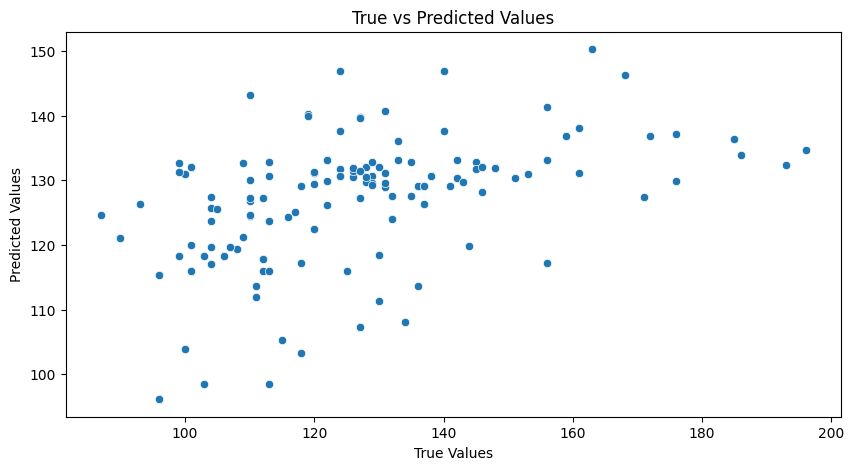

In [8]:
# Prepare the data
X = df_f2.drop(['max_glucose_2h'], axis=1)  # Exclude target variable for features
y = df_f2['max_glucose_2h']  # Target variable

# Add a constant to the model (for the intercept)
X_sm = sm.add_constant(X)
X_sm['const'] = 100

# Create a model and fit it to the entire dataset
model = sm.OLS(y, X_sm).fit()

# Predict using the same dataset
y_pred = model.predict(X_sm)

# Plot the predicted vs the actual values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y, y=y_pred)  # Adjusted to use the full dataset for both axes
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()


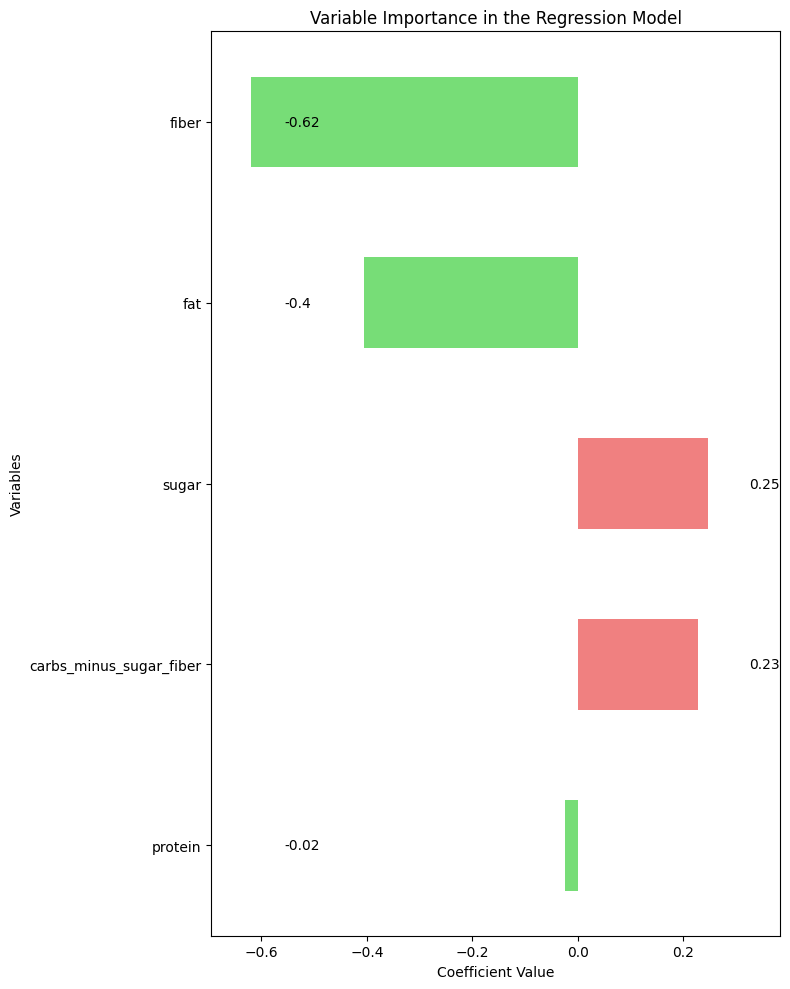

In [9]:
# Variable importance chart

# Calculate the standard deviation of each feature in X and the target y
std_X = X.std()
std_y = y.std()

# Get the coefficients from the model, excluding the intercept
coefficients = model.params.drop('const')

# Sort the coefficients by their absolute values for ordering, but retain the original signed values for plotting
ordering_index = coefficients.abs().sort_values(ascending=True).index
coefficients_sorted_with_sign = coefficients.loc[ordering_index]

# Define colors based on the signed value of coefficients
colors = ['#f08080' if x > 0 else '#77DD77' for x in coefficients_sorted_with_sign]

# Plotting
fig, ax = plt.subplots(figsize=(8, 10))
bars = coefficients_sorted_with_sign.plot(kind='barh', color=colors, ax=ax)

# Adjusting text positioning and x-axis limits to accommodate labels
max_coeff_value = abs(coefficients_sorted_with_sign).max()
text_offset = max_coeff_value * 0.05  # Adjust based on your preference

# Extend xlim to create space for the labels
ax.set_xlim([ax.get_xlim()[0] - text_offset, ax.get_xlim()[1] + text_offset * 3])

# Add coefficient values as text labels on the appropriate side of the bars
for index, var in enumerate(coefficients_sorted_with_sign.index):
    value = coefficients_sorted_with_sign[var]
    # Positioning for positive and negative values to ensure readability
    if value > 0:
        text_position = ax.get_xlim()[1]  
        ha = 'right'
    else:
        text_position = ax.get_xlim()[0] *0.8
        ha = 'left'
    ax.text(text_position, index, f'{round(value, 2)}', va='center', color='black', size=10, ha=ha)

plt.title('Variable Importance in the Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.tight_layout()  # Adjust layout to make room for the text labels
plt.show()

In [10]:
# Find the largest residuals
df_f2['residuals'] = y - y_pred
df_f2['residuals_abs'] = np.abs(df_f2['residuals'])
df_f2 = df_f2.sort_values('residuals_abs', ascending=False)
df_f2.head()

,sugar,fiber,fat,protein,max_glucose_2h,carbs_minus_sugar_fiber,residuals,residuals_abs
datetime,,,,,,,,
2024-04-07 06:27:00,13.500,7.3000,7.8800,11.9700,196.0,38.7200,61.313130,61.313130
2024-03-24 08:29:00,0.450,5.1500,5.4500,17.0500,193.0,33.1500,60.603845,60.603845
2024-03-23 09:48:00,17.533,2.4920,0.1780,4.9612,186.0,3.3286,52.095677,52.095677
2024-04-22 21:59:00,6.930,1.4922,40.0544,77.9228,185.0,101.7548,48.600135,48.600135
2024-04-03 08:17:00,8.000,0.0000,25.6000,12.0000,176.0,35.2000,46.109357,46.109357
